In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

In [2]:
def get_data(n, p, m):
    data = []
    for i in n:
        data.append(bernoulli.rvs(p, size=(m, i)))
    return data

def get_interval(data, epsilon):
    upper = []
    lower = []
    for i in data:
        lower.append(np.mean(i) - epsilon)
        upper.append( np.mean(i) + epsilon)
    return lower, upper

In [3]:
alpha = 0.05
p = 0.4
n = [10, 100, 1000, 10000]
m = 1000
epsilon = [np.sqrt(np.log(2/alpha)/(2*i)) for i in n]
dataset = get_data(n, p, m)

n = 10, p = 0.4, epsilon = 0.4294694083467376, coverage = 1.0
n = 100, p = 0.4, epsilon = 0.13581015157406195, coverage = 0.997
n = 1000, p = 0.4, epsilon = 0.04294694083467376, coverage = 0.99
n = 10000, p = 0.4, epsilon = 0.013581015157406196, coverage = 0.996


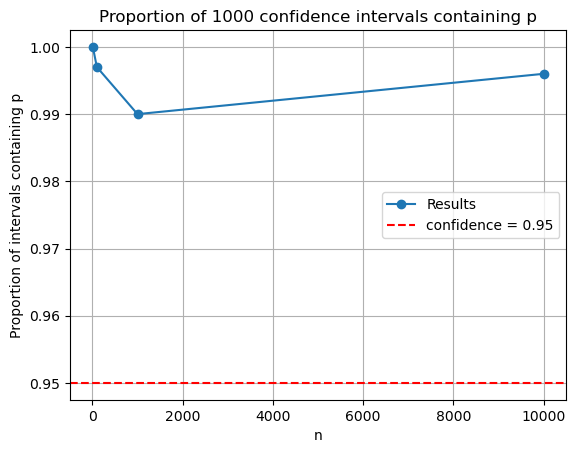

In [4]:
coverage = []
for i in range(len(n)):
    lower, upper = get_interval(data=dataset[i], epsilon=epsilon[i])
    coverage_0 = (np.greater_equal(p, lower) & np.less_equal(p, upper)).mean()
    coverage.append(coverage_0)
    print(f"n = {n[i]}, p = {p}, epsilon = {epsilon[i]}, coverage = {coverage_0}")
plt.plot(n, coverage, marker='o', label='Results')
plt.axhline(y=1 - alpha, color='r', linestyle='--', label=f'confidence = {1-alpha}')
plt.xlabel('n')
plt.ylabel('Proportion of intervals containing p')
plt.title('Proportion of 1000 confidence intervals containing p')
plt.grid(True)
plt.legend()
plt.show()

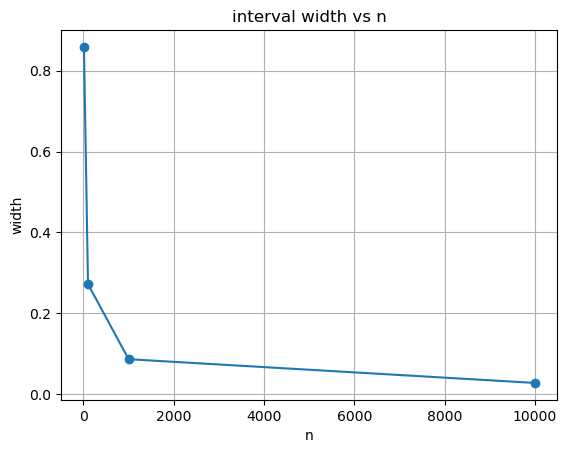

In [5]:
plt.plot(n, [2*e for e in epsilon], marker='o')
plt.xlabel('n')
plt.ylabel('width')
plt.title('interval width vs n')
plt.grid(True)
plt.show()

In [6]:
p = 0.5
coverage = []
for i in range(len(n)):
    lower, upper = get_interval(data=dataset[i], epsilon=epsilon[i])
    coverage_0 = (np.greater_equal(p, lower) & np.less_equal(p, upper)).mean()
    coverage.append(coverage_0)
    print(f"n = {n[i]}, p = {p}, epsilon = {epsilon[i]}, coverage = {coverage_0}")

n = 10, p = 0.5, epsilon = 0.4294694083467376, coverage = 0.996
n = 100, p = 0.5, epsilon = 0.13581015157406195, coverage = 0.765
n = 1000, p = 0.5, epsilon = 0.04294694083467376, coverage = 0.0
n = 10000, p = 0.5, epsilon = 0.013581015157406196, coverage = 0.0


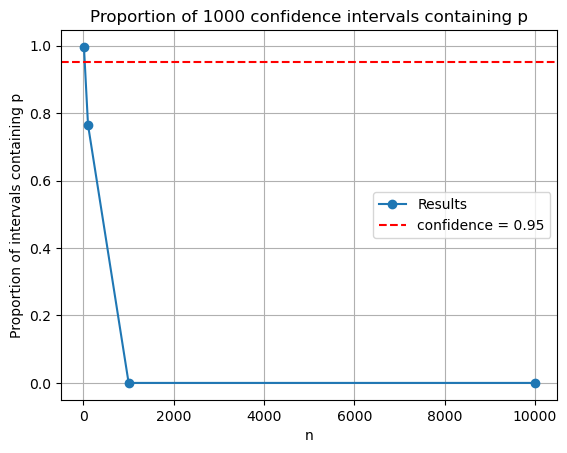

In [7]:
plt.plot(n, coverage, marker='o', label='Results')
plt.axhline(y=1 - alpha, color='r', linestyle='--', label=f'confidence = {1-alpha}')
plt.xlabel('n')
plt.ylabel('Proportion of intervals containing p')
plt.title('Proportion of 1000 confidence intervals containing p')
plt.grid(True)
plt.legend()
plt.show()